# 二, MVDR波束形成

**常规波束处理**

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import  warnings
warnings.filterwarnings("ignore", module="matplotlib")   
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 数据读取
data = pd.read_csv("./data/audio_2.csv")

theta = np.arange(-90, 90, 0.1).reshape([1, -1]) 
theta = theta / 180 * np.pi # 入射角度

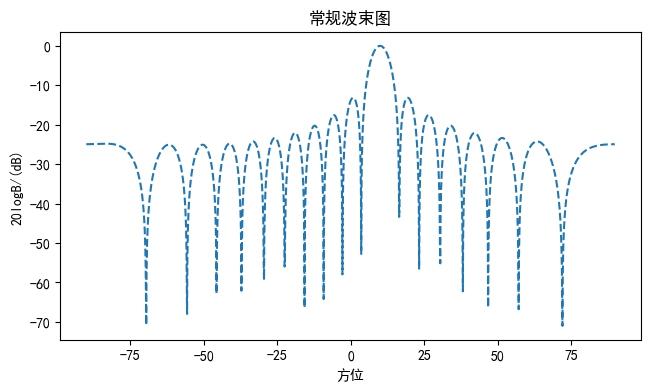

In [19]:
# 数据提取：响应向量
a = data.iloc[:,:1800]
a = a.map(eval)
a = np.matrix(a)

# 数据提取：加权向量
w = data.iloc[:,1800]
w = [eval(i) for i in w]
w = np.matrix(w).T

# 波束形成
B = np.dot(a.transpose(), np.conj(w)) # 波束响应 = wa
B = np.abs(B) / np.max(np.abs(B)) # 波束响应

plt.figure(figsize=(7.5,4))
plt.xlabel('方位')
plt.ylabel('20logB/(dB)')
plt.title('常规波束图')
plt.plot(theta.reshape([-1,1])*180/np.pi, 20 * np.log10(B.reshape([-1,1])), '--')

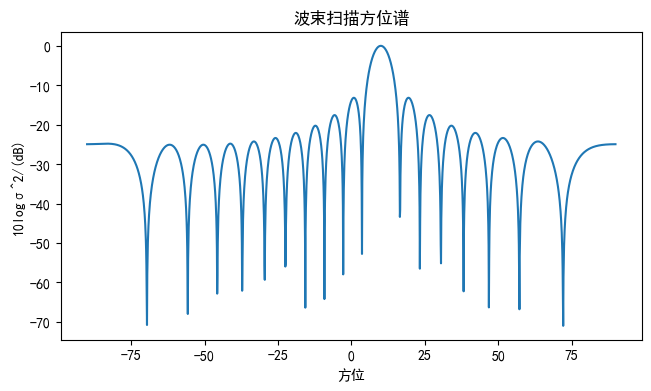

In [20]:
# 方位估计
w1 = data.iloc[:,1801:-1]
w1 = w1.map(eval)
w1 = np.matrix(w1)

a1 = data.iloc[:,-1]
a1 = [eval(i) for i in a1]
a1 = np.matrix(a1).T

sigma = np.transpose(np.conj(w1)) * a1 * np.transpose(np.conj(a1)) * w1
sigma = np.diag(sigma)
sigma = sigma / np.max(sigma)

plt.figure(figsize=(7.5,4))
plt.xlabel('方位')
plt.ylabel('10logσ^2/(dB)')
plt.title('波束扫描方位谱')
plt.plot(theta.reshape([-1,1])*180/np.pi, 10 * np.log10(sigma))

**MVDR波束形成**

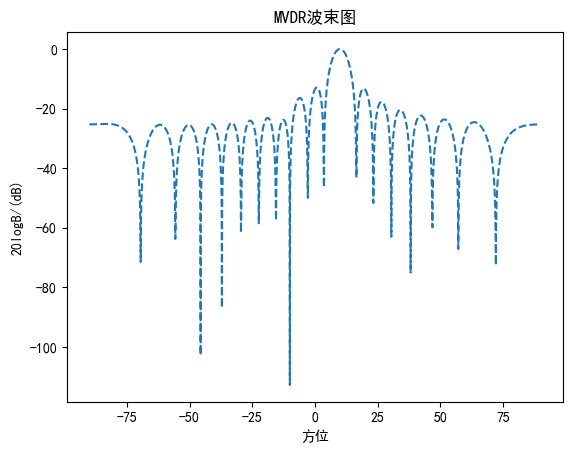

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 数据读取
data1 = pd.read_csv("./data/mvdr_audio_2.csv")

# 数据提取：响应向量
a = data1.iloc[:,:-1]
a = a.applymap(eval)
a = np.matrix(a)

# 数据提取：加权向量
w = data1.iloc[:,-1]
w = [eval(i) for i in w]
w = np.matrix(w).T

# 角度射入阵列
theta = np.arange(-90, 90, 0.1).reshape([1, -1])
theta = theta / 180 * np.pi

# 波束形成
B = w.H * a
B = np.abs(B) / np.max(np.abs(B))

plt.figure()
plt.xlabel('方位')
plt.ylabel('20logB/(dB)')
plt.title('MVDR波束图')
plt.plot(theta.reshape([-1,1])*180/np.pi, 20 * np.log10(B.reshape([-1,1])), '--')

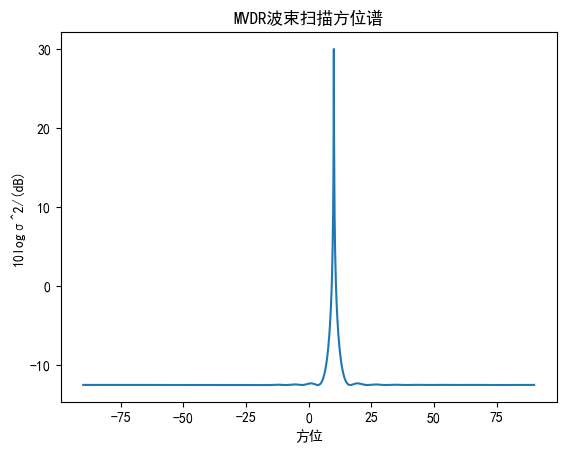

In [30]:
# 参数
N = 18 # 麦克风个数
c = 1500 # 声速
f = 50 # 频率
theta_0 = 10 # 角度


# 方位估计
N = int(N) # 阵元数目
l = int(c) / int(f) # 波长
n = np.arange(0, N, 1).reshape([-1, 1]) 
d = np.array([15]) * np.ones([N, 1]) # 初始化方向矩阵
theta_0 = int(theta_0) / 180 * np.pi # 期望方向
x = np.exp(1j * 2 * np.pi * np.sin(theta_0) * n * d / l) # 信号
Rx = np.mat(1000 * np.dot(x, np.transpose(np.conj(x))) + 1 * np.eye(N)) # 输出信号的功率

sigma = []
for i in range(theta.shape[1]):
    a_theta_0 = np.mat(np.exp(1j * 2 * np.pi * np.sin(theta[:, i]) * n * d / l))
    sigma.append((1 / (a_theta_0.H * Rx.I * a_theta_0)))
    
sigma = np.array(sigma).reshape([-1, 1])

plt.figure()
plt.xlabel('方位')
plt.ylabel('10logσ^2/(dB)')
plt.title('MVDR波束扫描方位谱')
plt.plot(theta.reshape([-1,1])*180/np.pi, 10 * np.log10(sigma))